In [162]:
import mysql.connector
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [173]:
with open('../db_config.json') as config_json:
    config = json.load(config_json)

conx = mysql.connector.connect(**config) 

In [174]:
mycursor = conx.cursor()

get_data = "SELECT * from grammys"
mycursor.execute(get_data)

results = mycursor.fetchall()

mycursor.close()

grammys_df = pd.DataFrame(results, columns=['year','title','published_at','updated_at','category','nominee','artist','workers','img','winner'])

In [175]:
print(f"Dataset shape: {grammys_df.shape[0]} Rows and {grammys_df.shape[1]} Columns")

Dataset shape: 4810 Rows and 10 Columns


#### Columns:
- **year:** Year of the awards.
- **title:** Name of the ceremony.
- **published_at:** Date when this information was published at.
- **updated_at:** Date when this information was updated at.
- **category:** Category of the award.
- **nominee:** Nominee for the award.
- **artist:** Artist of the song or album.
- **workers:** People who worked on the nominee.
- **img:** Url of the picture of the award.
- **winner:**  Whether the nominee won the award or not.

In [176]:
grammys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          4810 non-null   object        
 1   title         4810 non-null   object        
 2   published_at  4810 non-null   datetime64[ns]
 3   updated_at    4810 non-null   datetime64[ns]
 4   category      4810 non-null   object        
 5   nominee       4810 non-null   object        
 6   artist        4810 non-null   object        
 7   workers       4810 non-null   object        
 8   img           4810 non-null   object        
 9   winner        4810 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 375.9+ KB


We can see the data types. Note that winner is not boolean, however it should be.

In [177]:
grammys_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,1
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,1
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,1
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,1
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,1


Looking at the first rows of the dataset, we can see that there are multiple nominees for the same category, but all have a positive value for the winner column. This does not make sense, because there can be only one winner for each category.

In [178]:
grammys_df.nunique()

year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4132
artist          1659
workers         2367
img             1464
winner             1
dtype: int64

By looking at the unique values, we can see that all nominees appear as winners in this dataset.

In [179]:
grouped_df = grammys_df.groupby(['year','title','category']).size().reset_index(name='count') # grouping by year, title and category
sort_grouped_df = grouped_df.sort_values(by = ['year', 'count'], ascending= False) # sorting descending by year and count
duplicates_df = sort_grouped_df[sort_grouped_df['count'] > 1] # taking all of the categories with more than one nominee
duplicates_df

,year,title,category,count
4346,2019,62nd Annual GRAMMY Awards (2019),Album Of The Year,8
4395,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,8
4428,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,8
4429,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,8
4367,2019,62nd Annual GRAMMY Awards (2019),Best Contemporary Classical Composition,6
...,...,...,...,...
359,1967,10th Annual GRAMMY Awards (1967),"Album Of The Year, Classical",2
365,1967,10th Annual GRAMMY Awards (1967),Best Classical Choral Performance (Other Than ...,2
323,1966,9th Annual GRAMMY Awards (1966),Best Classical Choral Performance (Other Than ...,2
113,1961,4th Annual GRAMMY Awards (1961),Best Contemporary Classical Composition,2


We can see that this happens all the way through all the dataset :(. Therefore, based on this, we can conclude that the 'winner' column is not trustworthy and does not provide any valuable information to the analysis. All rows are going to be intepreted as candidates for the Grammys.

'published_at', 'updated_at' and 'img' are also not valuable for this case of use.

In [180]:
grammys_df = grammys_df.drop(['published_at','updated_at','img','winner'], axis=1)

In [181]:
grammys_df.head(10)

,year,title,category,nominee,artist,workers
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi..."
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V..."
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ..."
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H..."
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C..."
5,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,"Andrew ""VoxGod"" Bolooki, Jocelyn “Jozzy” Donal..."
6,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Truth Hurts,Lizzo,"Ricky Reed & Tele, producers; Chris Galland, M..."
7,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Sunflower,Post Malone & Swae Lee,"Louis Bell & Carter Lang, producers; Louis Bel..."
8,2019,62nd Annual GRAMMY Awards (2019),Album Of The Year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi..."
9,2019,62nd Annual GRAMMY Awards (2019),Album Of The Year,"I,I",Bon Iver,"Brad Cook, Chris Messina & Justin Vernon, prod..."


In [182]:
grammys_df.describe(include='object')

,year,title,category,nominee,artist,workers
count,4810,4810,4810,4810,4810,4810
unique,62,62,638,4132,1659,2367
top,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bridge Over Troubled Water,unknown,unknown
freq,433,433,70,7,1840,2190


We can see that the ceremony that appears the most in the dataset is the 2019 ceremony. This is beacuse for this year, the dataset presents only nominees and classifies them all as winners, whereas in other years, the catagories are much less repeated and in most cases does show the winner, as we can see in duplicates_df.

In addition, the category that repeats the most is 'song of the year', wich is probably the most anticipaded category both for nominees and watchers of the ceremony each year. We can see that the most nominated was 'Brige Over Troubled Water' with 7 nominations. There's no extremely successful artist called 'unknown' that was nominated 1840 times, sadly this is just how nulls were filled in the database. The same applies for workers

category
Best Classical Opera Production                                                  1
Best Album Created For Children                                                  1
Best Sound Track Album, Original Cast - Motion Picture Or Television             1
Best Instrumental Arrangement With Accompanying Vocals                           1
Best Instrumental Soloist Performance (With Orchestra)                           1
Best Instrumental Soloist Performance Without Orchestra                          1
Best Arrangement Accompanying Vocal(s)                                           1
Best Sound Track Album - Background Score From A Motion Picture Or Television    1
Best Performance By A "Top 40" Artist                                            1
Best Children's Music Album                                                      1
Name: count, dtype: int64


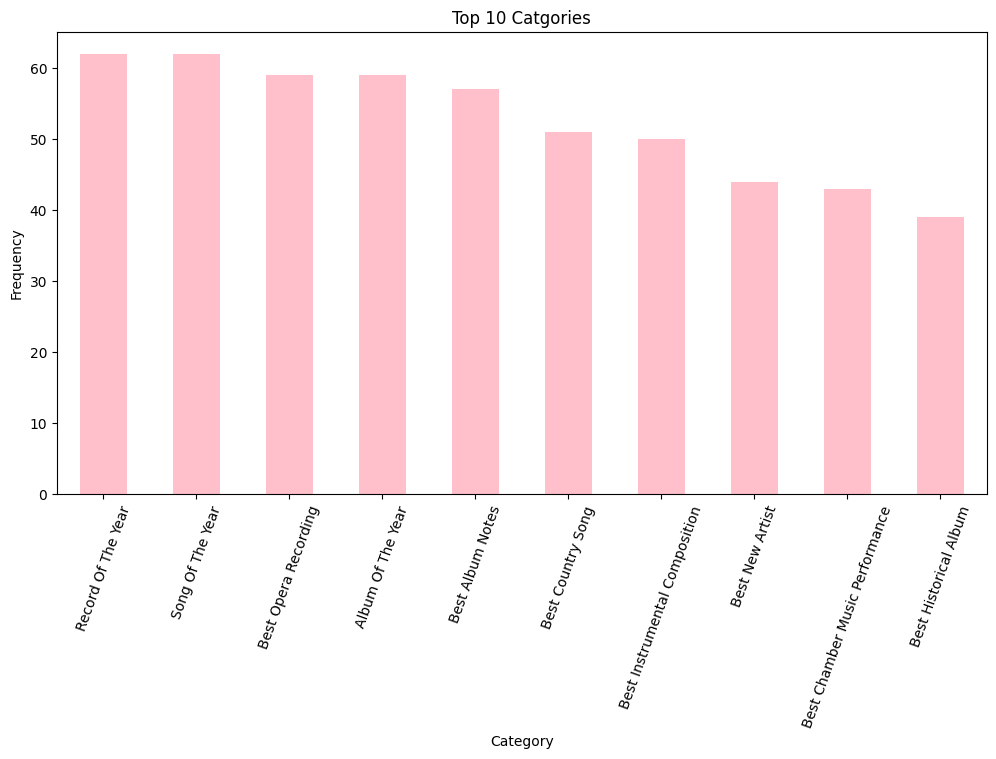

In [183]:
first_occurrences_df = grammys_df.groupby(['year','title','category']).first().reset_index()
first_occurrences_df.tail()

cat_counts = first_occurrences_df['category'].value_counts()
# print(cat_counts)

top_10_categories = cat_counts.head(10)
least_freq_categories = cat_counts.tail(10)
print(least_freq_categories)

plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='pink')
plt.title('Top 10 Catgories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()


This plot shows the top ten categories ever introduced in the Grammy Awards. In order to avoid a bias because of the repeated values per category in many occurrences, only one row was taken per category each year. So now, we can see that the categories that appeared the most were 'Record of The Year' and 'Song of The Year', which are probably the best known categories, whereas the ones that appeared the least were very specific categories that must have appeared in only one ceremony and then removed by The Recording Academy.

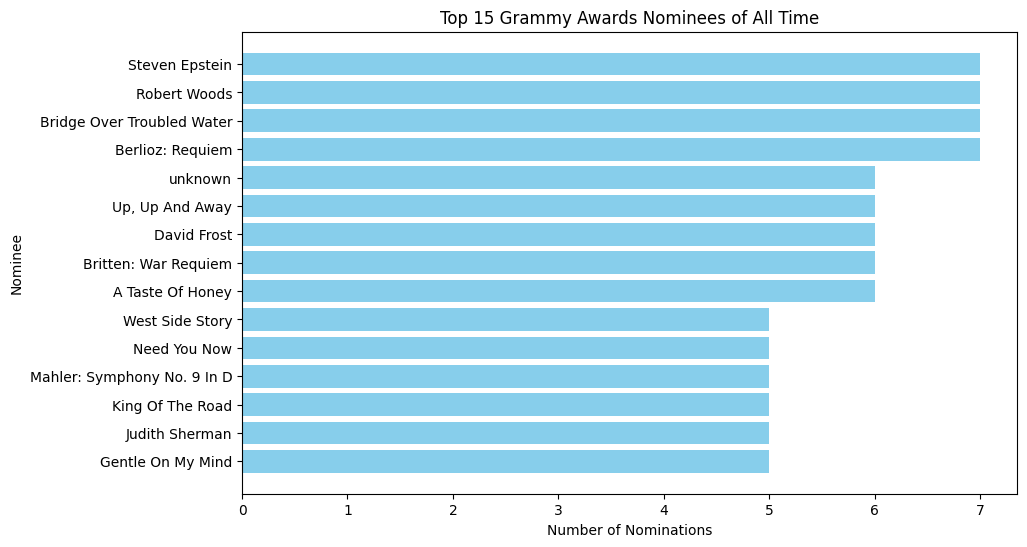

In [184]:
nom_count = grammys_df.groupby('nominee').size().reset_index(name='nominations')
nom_count = nom_count.sort_values(by=['nominations', 'nominee'], ascending=False)
top_nominees = nom_count.head(15)
top_nominees 


plt.figure(figsize=(10, 6))
plt.barh(top_nominees['nominee'], top_nominees['nominations'], color='skyblue')
plt.xlabel('Number of Nominations')
plt.ylabel('Nominee')
plt.title('Top 15 Grammy Awards Nominees of All Time')
plt.gca().invert_yaxis() 

plt.show()

The most nominated of all time were Steven Epstein, Robert Woods, Brigde Over Troubled Water and Berlioz: Requiem with 7 nominations each. Steven Epstein who, according to the web, is an american classical music producer has actually won 16 American Grammys, 2 Latin Grammys and was nominated a total of 35 times. However, it is correct in this dataset that he won 7 Awards in the 'Classical Producer of the Year', the other categories in which he won the rest of the awards are probably not present in the datset.

The next one is Robert Woods, also a classical music producer. Acorrding to the Grammys official website, he has won 13 Grammys and was nomitaned 29 times. Similarly to the past nominee, It is correct that he won 7 Awards in the 'Classical Producer of the Year category'.

The other two most nominated were 'Brigde Over Troubled Water', a 70's song with an album with the same name, and 'Berlioz: Requiem', a classical piece.

artist
unknown              1840
(Various Artists)      66
U2                     18
Aretha Franklin        16
Ella Fitzgerald        13
Bruce Springsteen      13
Stevie Wonder          13
Beyoncé                13
Jimmy Sturr            12
Ray Charles            12
Name: count, dtype: int64


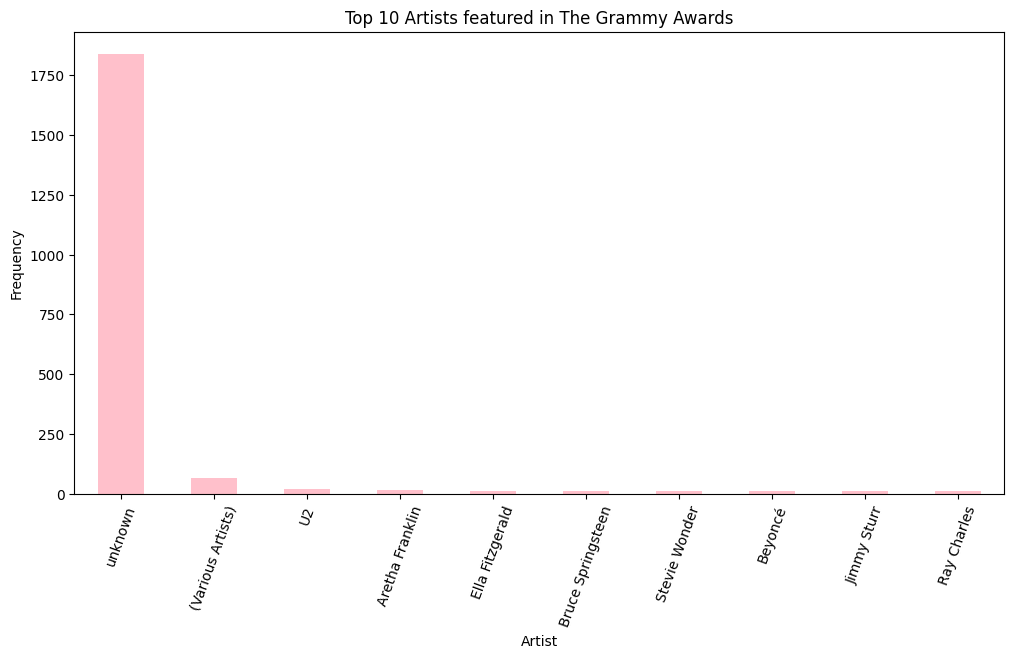

In [187]:
top_artists = grammys_df['artist'].value_counts().head(10)
print(top_artists)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='pink')
plt.title('Top 10 Artists featured in The Grammy Awards')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

We can see that many rows do not show the specific information for artists in this dataset. Let's remove these rows to see better the specific artists that have been featured in the ceremonies.

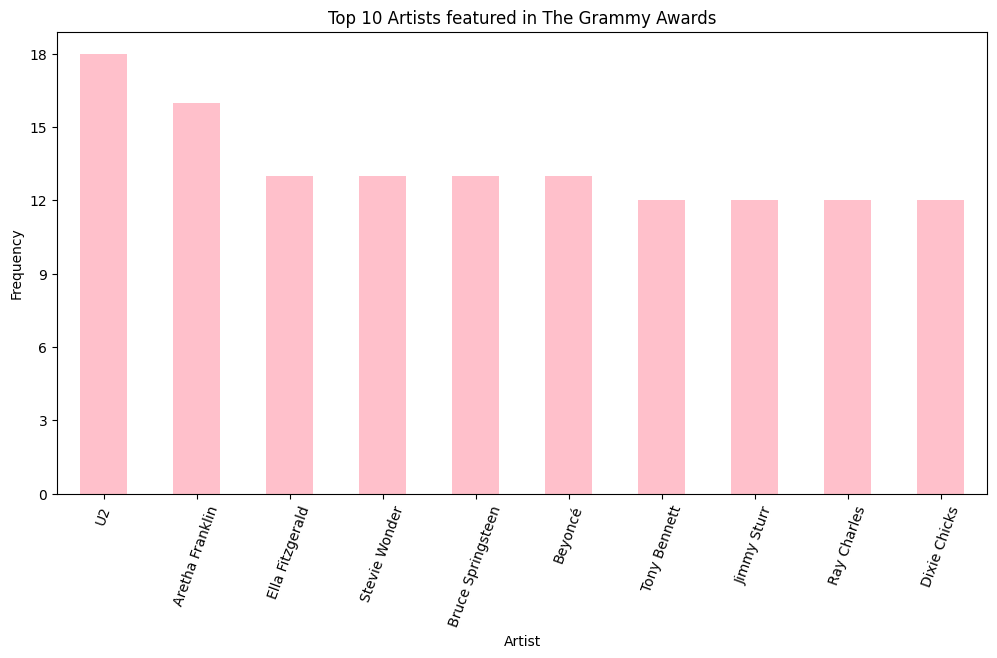

In [188]:
known_artists = grammys_df[grammys_df['artist'] != 'unknown']
single_artists = known_artists[known_artists['artist'] != '(Various Artists)']
top_artists = single_artists['artist'].value_counts().head(10)
top_artists = top_artists.astype(int)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='pink')
plt.title('Top 10 Artists featured in The Grammy Awards')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.yticks(np.arange(0, top_artists.max()+1, 3))
plt.show()

We can see that U2, Aretha Franklin and Ella Fitzgerald were the most featured artists in the Grammy Awards. This means that they were the interpreters of many songs, albums or recordings that wene nominated for an award in any category.

For future analysis, it seems more useful to take only the rows that contain a song nominee. We are going to filter the dataset based on the category of the nominee. Investigation in the Grammys official website showed the award categories that included songs. So, based on that, the filtering was made based on rows in which the category included the words 'song', 'performance' or 'record'.

In [191]:
mask = (grammys_df['category'].str.contains('song', case=False, na=False) |
        grammys_df['category'].str.contains('performance', case=False, na=False) |
        grammys_df['category'].str.contains(r'record\sor[^i]', case=False, na=False, regex=True)) # making sure to take record only and not recording

result_df = grammys_df[mask]
print(result_df.shape)
result_df.head()

(2009, 6)


,year,title,category,nominee,artist,workers
16,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,unknown,"Billie Eilish O'Connell & Finneas O'Connell, s..."
17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,unknown,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo..."
18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,unknown,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ..."
19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,unknown,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris..."
20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,unknown,"Taylor Swift, songwriter (Taylor Swift)"


We can see that the datset has narrowed down to 2009 rows.

In [192]:
result_df.nunique()

year          62
title         62
category     321
nominee     1806
artist       823
workers      550
dtype: int64

We still have data for all years and now we have 321 categories out of 638 in total. There are also now 1806 nominees and 836 less artists.

In [216]:
grouped_df = result_df.groupby(['category','nominee']).size().reset_index(name='count')
sorted_grouped_df = grouped_df.sort_values(by = 'count', ascending= False)
sorted_grouped_df.head()

,category,nominee,count
1436,"Best R&B Vocal Performance, Female",Giving You The Best That I Got,2
1193,Best Pop Instrumental Performance,Caravan,2
200,Best Classical Performance - Orchestra,Bartók: Concerto For Orchestra,2
1111,Best Orchestral Performance,Mahler: Symphony No. 9,2
120,Best Choral Performance (Other Than Opera),Haydn: The Creation,2


Some of the songs seem to have appeared twice in these categories, did this happen in the same year in all cases?

In [217]:
grouped_df = result_df.groupby(['year','category','nominee']).size().reset_index(name='count')
sorted_grouped_df = grouped_df.sort_values(by = 'count', ascending= False)
sorted_grouped_df.head()

,year,category,nominee,count
0,1958,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,1
1335,2000,Best Chamber Music Performance,Shostakovich: The String Quartets,1
1348,2000,Best Male Country Vocal Performance,Solitary Man,1
1347,2000,Best Instrumental Soloist(s) Performance (with...,Maw: Violin Concerto,1
1346,2000,Best Instrumental Soloist Performance (without...,"Dreams Of A World - Works Of Lauro, Ruiz-Pipo ...",1


In [214]:
sorted_grouped_df.shape

(2009, 4)

We can see that if there seem to repeated songs, it's because they were nominees for more than one category in different years.